In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gun-deaths-in-america-cdc/gun_deaths.csv


## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [3]:
df = pd.read_csv('/kaggle/input/gun-deaths-in-america-cdc/gun_deaths.csv')

In [4]:
df.head()

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED


## Checking Datatype and Data Timeline

In [5]:
print(df[['year','month']].min())
print(df[['year','month']].max())

year     2012
month       1
dtype: int64
year     2014
month      12
dtype: int64


In [6]:
df.dtypes

year           int64
month          int64
intent        object
police         int64
sex           object
age          float64
race          object
place         object
education     object
dtype: object

## Analyzing Data by Visualization

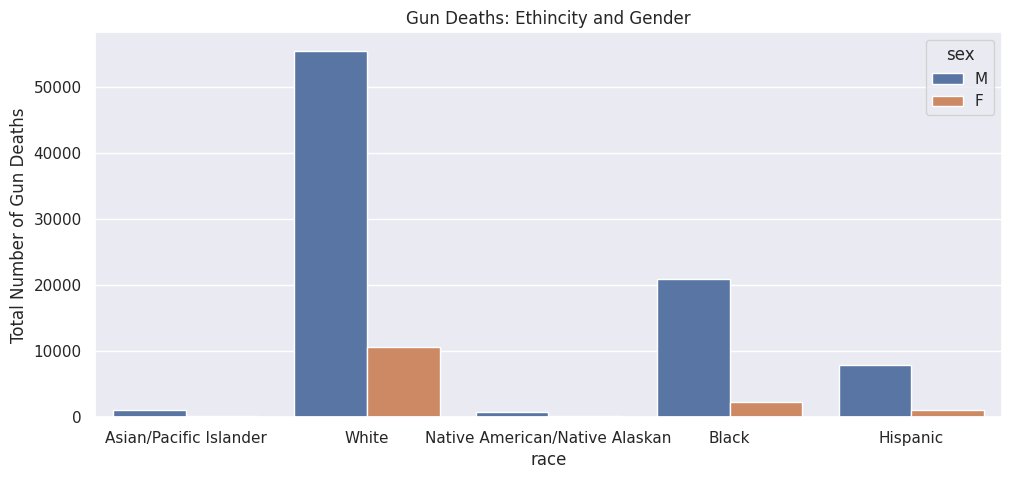

In [7]:
sns.set(rc={'figure.figsize':(11.7,5)})
g = sns.countplot(data=df,x='race',hue='sex')
g.set_title('Gun Deaths: Ethincity and Gender')
g.set(ylabel='Total Number of Gun Deaths')
plt.show()

**Gun deaths is high among White people in both genders.**

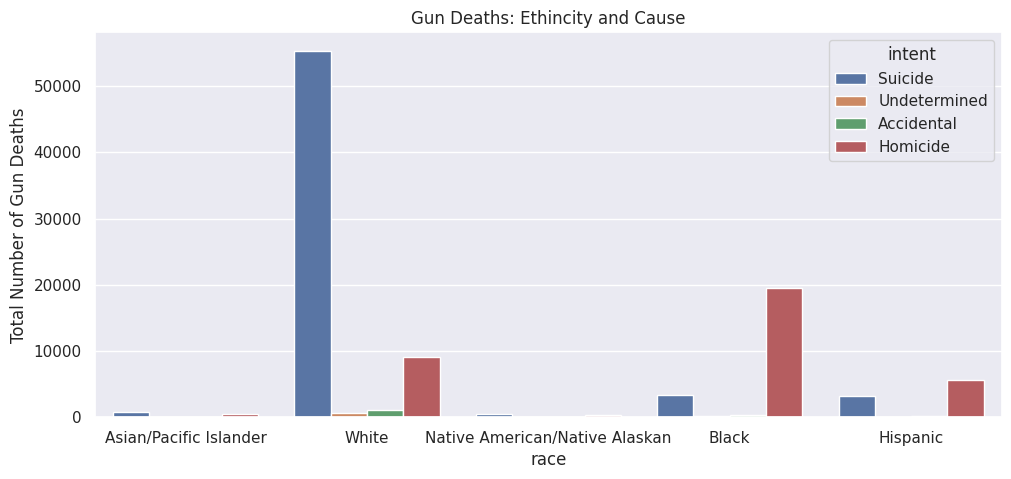

In [8]:
sns.set(rc={'figure.figsize':(11.7,5)})
g = sns.countplot(data=df,x='race',hue='intent')
g.set_title('Gun Deaths: Ethincity and Cause')
g.set(ylabel='Total Number of Gun Deaths')
plt.show()

**Gun deaths is high among White people in suicide and accidental.**
**Homicide is major cause of Gun deaths in Black people.**

## Checking Age Factor in Gun Deaths

In [9]:
df['age'].describe()


count    100780.000000
mean         43.857601
std          19.496181
min           0.000000
25%          27.000000
50%          42.000000
75%          58.000000
max         107.000000
Name: age, dtype: float64

In [10]:
bins = [0,18,30,60,90,108]
labels= ['Minors','18+ Young Age','30+ Middle Age','60+ Senior Citizen','90+ Long Livers']
df['age_category'] = pd.cut(df['age'],bins= bins,labels=labels,include_lowest=True)

In [11]:
df['age_category'].head()

0        30+ Middle Age
1         18+ Young Age
2        30+ Middle Age
3    60+ Senior Citizen
4        30+ Middle Age
Name: age_category, dtype: category
Categories (5, object): ['Minors' < '18+ Young Age' < '30+ Middle Age' < '60+ Senior Citizen' < '90+ Long Livers']

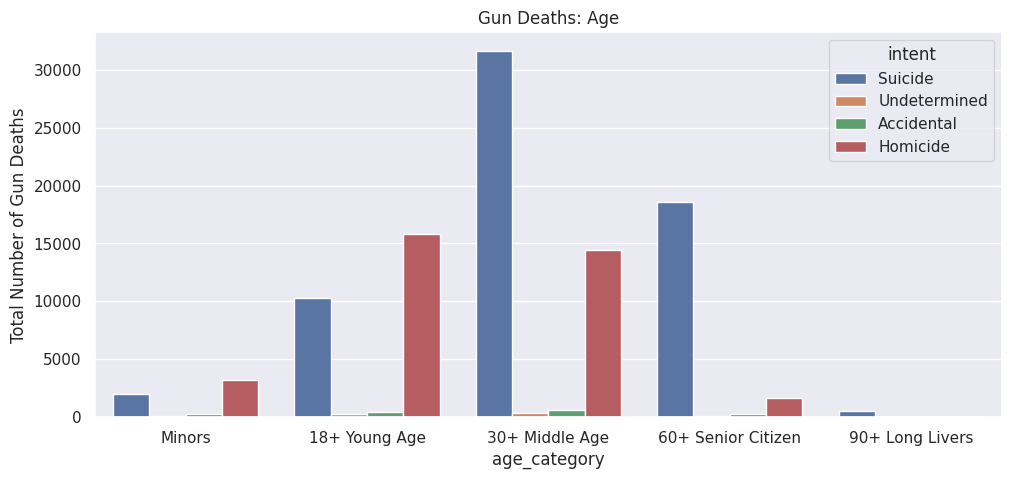

In [12]:
sns.set(rc={'figure.figsize':(11.7,5)})
g = sns.countplot(data=df,x='age_category',hue='intent')
g.set_title('Gun Deaths: Age')
g.set(ylabel='Total Number of Gun Deaths')
plt.show()

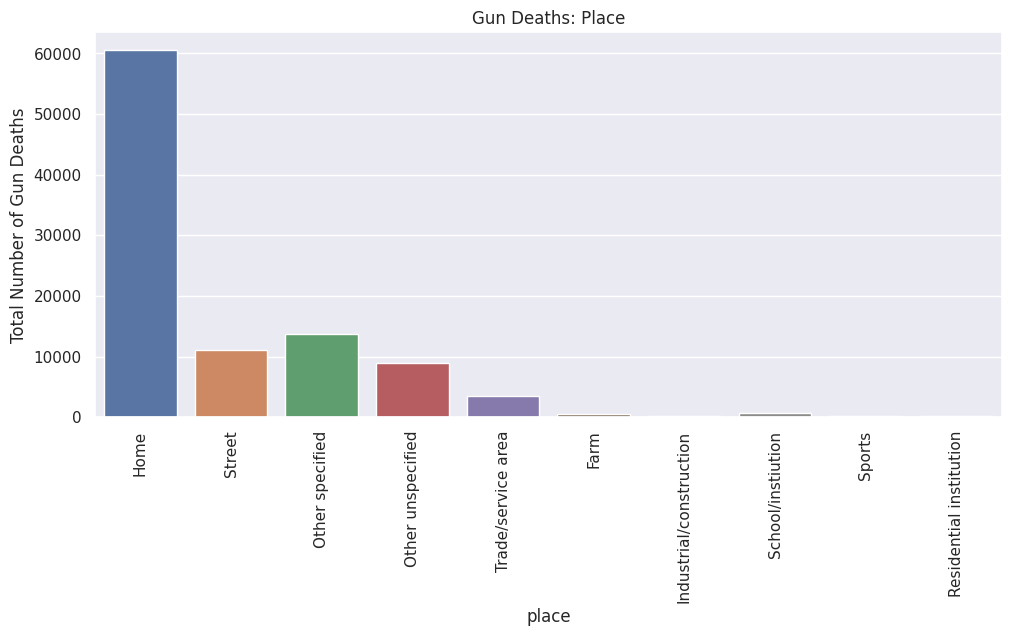

In [13]:
sns.set(rc={'figure.figsize':(11.7,5)})
g = sns.countplot(data=df,x='place')
g.set_title('Gun Deaths: Place')
g.set(ylabel='Total Number of Gun Deaths')
plt.xticks(rotation = 90)
plt.show()